**Task:** Build a classification model using the Heart Disease UCI dataset, perform data cleaning, visualize key relationships, and evaluate model performance using metrics like accuracy, precision, recall, and F1 score

Heart Disease UCI Dataset on Kaggle (Alternatively, upload a CSV version directly to Colab)

1. Import Libraries & Load Data
- Read the CSV file into a DataFrame
- Display data structure and summary
2. Preprocessing
- Handle missing values (if any)
- Convert categorical variables into numerical (using label encoding or one-hot encoding)
- Normalize or scale numerical features if needed
3. Exploratory Data Visualization
- Create at least three visualizations to explore:
  - Distribution of target variable
  - Correlation heatmap
  - Comparison of features across the target (e.g., chest pain vs. target)
4. Build a Predictive Model
- Split the data into training and testing sets
- Train a Logistic Regression or Random Forest Classifier
- Evaluate using accuracy, precision, recall, and F1 score
5. Visualize Results
- Plot the confusion matrix using Seaborn
- Create a bar chart comparing all the evaluation metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Data loading
Load the data from "heart.csv" into a dataframe.


**Reasoning**:
Load the data into a pandas DataFrame, display the head, shape, and data types.



In [2]:
df = pd.read_csv('heart.csv')
display(df.head())
print("Shape of the DataFrame:", df.shape)
print("\nData types of columns:")
print(df.dtypes)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Shape of the DataFrame: (1025, 14)

Data types of columns:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## Data cleaning

Check for and remove duplicate rows from the DataFrame.


**Reasoning**:
Check for and remove duplicate rows from the DataFrame.



In [3]:
print("Shape of DataFrame before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame before removing duplicates: (1025, 14)
Shape of DataFrame after removing duplicates: (302, 14)


## Preprocessing

Handle missing values (if any), convert categorical variables into numerical (using one-hot encoding), and normalize numerical features using StandardScaler.


**Reasoning**:
Check for missing values in the DataFrame, define categorical and numerical columns, apply one-hot encoding to categorical columns, and apply standard scaling to the numerical columns.



In [4]:
print("Missing values per column:")
print(df.isnull().sum())

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
display(df_encoded.head())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## Exploratory data visualization

Create visualizations to understand the data distribution, correlations, and feature relationships with the target variable.


**Reasoning**:
Create a count plot of the 'target' variable, a correlation heatmap of the encoded dataframe, and a box plot comparing 'thalach' across 'cp' and 'target'.



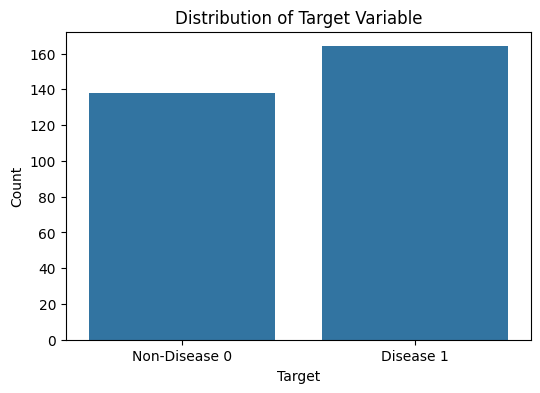

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Disease 0', 'Disease 1'])
plt.show()

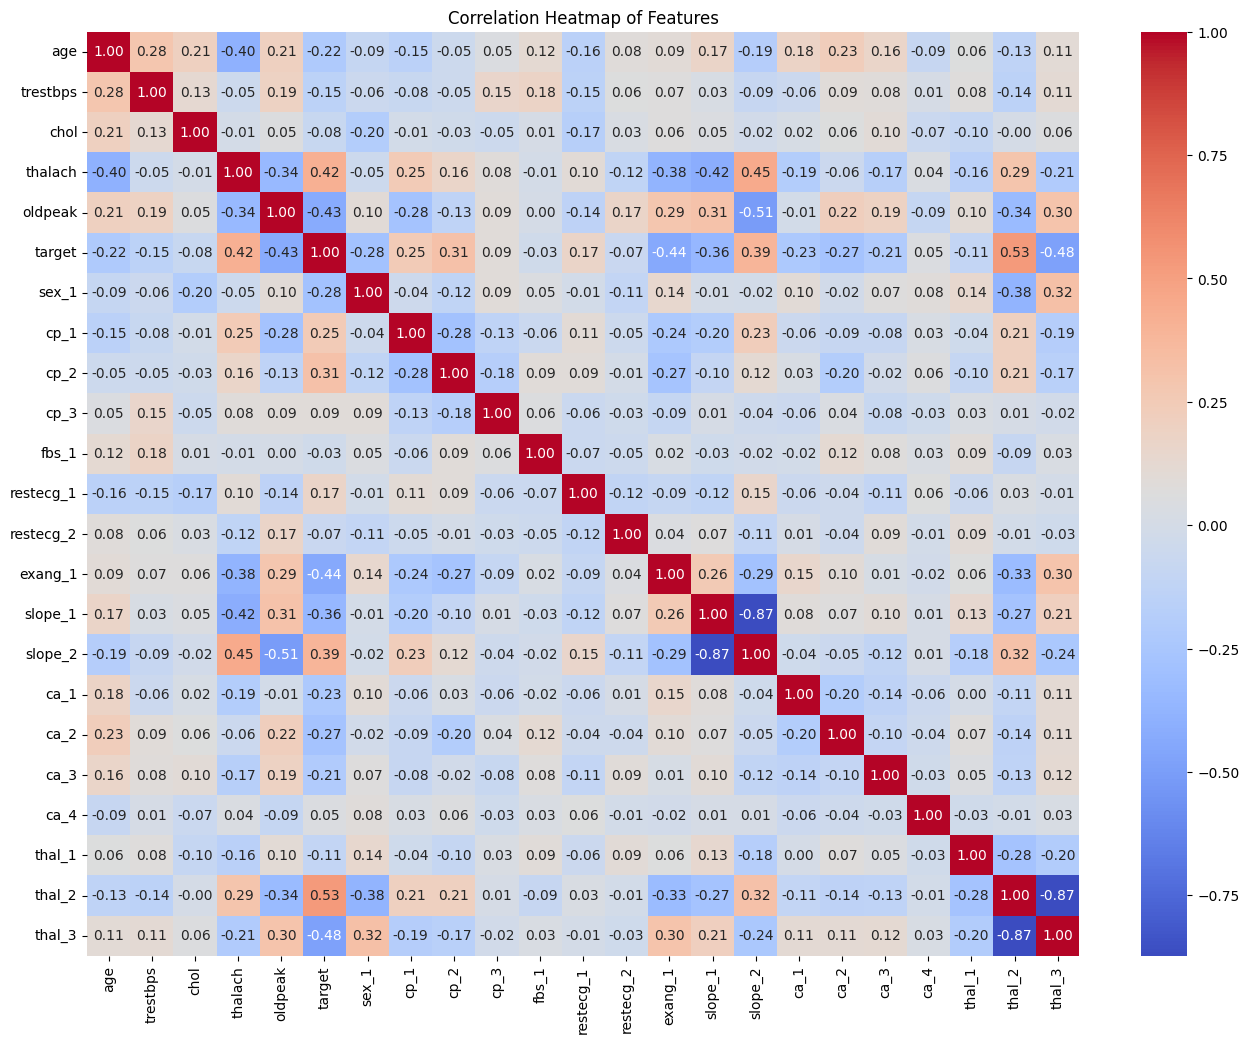

In [6]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 10}, fmt='.2f') # Added fmt='.2f' here
plt.title('Correlation Heatmap of Features')
plt.show()

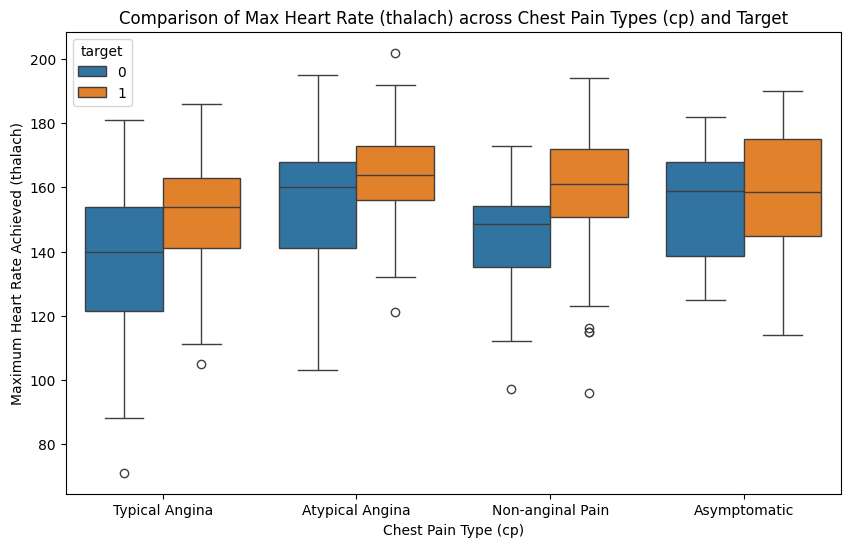

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='thalach', hue='target', data=df)
plt.title('Comparison of Max Heart Rate (thalach) across Chest Pain Types (cp) and Target')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

## Build and evaluate a model

Split the data into training and testing sets, train a Logistic Regression model, and evaluate its performance using accuracy, precision, recall, and F1 score.


**Reasoning**:
Define features (X) and target (y), split the data into training and testing sets, initialize and train a Logistic Regression model, make predictions, calculate evaluation metrics, and print the results.



In [8]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7869
Precision: 0.7500
Recall: 0.8276
F1 Score: 0.7869


## Visualize results

Plot the confusion matrix and create a bar chart of the evaluation metrics.


**Reasoning**:
Generate and display the confusion matrix and create and display a bar chart of the evaluation metrics.



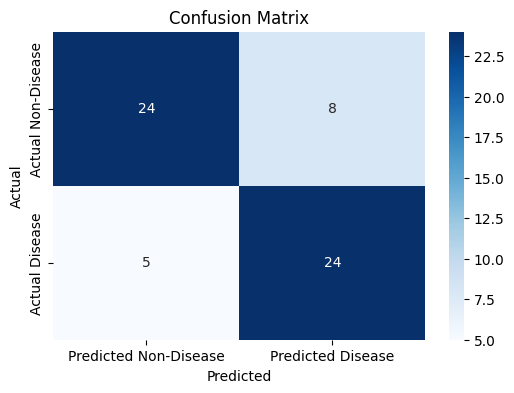

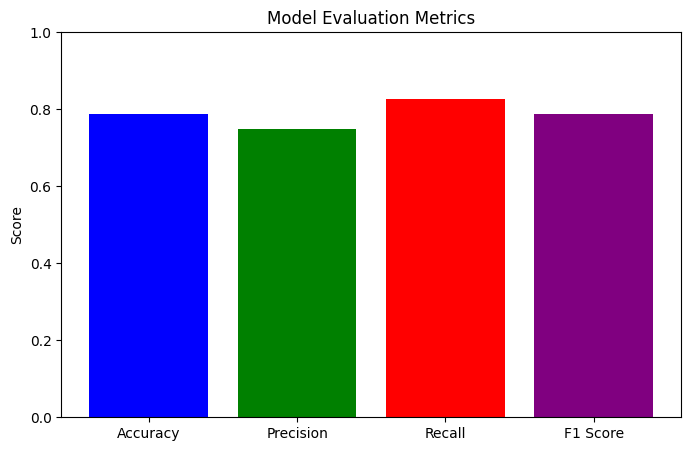

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Non-Disease', 'Predicted Disease'], yticklabels=['Actual Non-Disease', 'Actual Disease']) # Added labels here
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()